In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushape/ushape.csv


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/kaggle/input/ushape/ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0



This section renames the columns of the dataset to more understandable names,

where 'X' and 'Y' represent the features and 'class' represents the target variable.

This helps in making the dataset easier to work with for further analysis or modeling tasks.

In [16]:
column_new = {
    '3.159499363321345566e-02':'X',
    '9.869877579082642072e-01':'Y',
''  '0.000000000000000000e+00':'class'
}
df= df.rename(columns=column_new)
df.head()


,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


Creating scatter plot using the 'X' and 'Y' features from the dataset, with points colored according to their class.

This visualization helps in understanding the distribution and relationships between features, as well as how different classes are separated or grouped

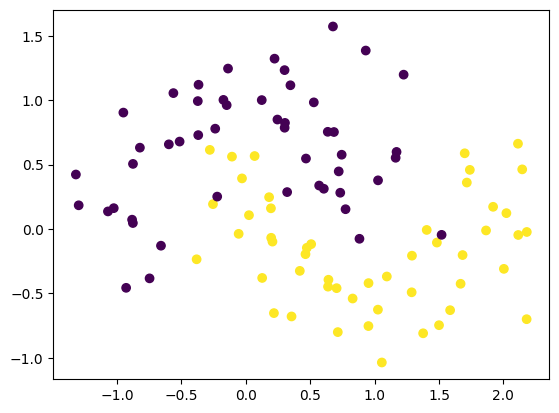

In [17]:
plt.scatter(df['X'], df['Y'], c=df['class'])

Extracting the feature matrix X and the target vector y from the dataset.

X contains the first two columns (representing the features), while y contains the last column (representing the class labels)

In [18]:
X= df.iloc[:, 0:2].values
y= df.iloc[:, -1].values

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# For Sigmoid AF

The first layer is a dense layer with 5 neurons and ReLU activation, accepting 2 input features (input_dim=2).

The second layer is the output layer with 1 neuron, also using ReLU activation.

The model.summary() call prints the structure and parameters of the model, providing a quick overview of its architecture.

In [30]:
model = Sequential()

model.add(Dense(5, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

# Retrieves the weights and biases of each layer in the neural network model.

In [21]:
model.get_weights()

[array([[ 0.0812248 ,  0.91890275, -0.4983359 , -0.35747862,  0.67479134],
        [ 0.2641648 , -0.7756084 , -0.21298122,  0.09778965, -0.40500146]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.8973119 ],
        [ 0.8315604 ],
        [-0.2599802 ],
        [-0.9490819 ],
        [ 0.95905757]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
initial_weights = model.get_weights()

Initializes the weights of the model layers to zero. The code assigns zero arrays with the same shape as the existing weights for each layer.

This approach highlights the issue of zero weight initialization, which can lead to poor learning and convergence in neural networks,

as all neurons in a layer would learn the same features, making the network ineffective.

In [23]:
#Setting initial weights to zero(0)
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [24]:
model.set_weights(initial_weights)

In [25]:
model.get_weights()

[array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

Compiles the model with the binary cross-entropy loss and Adam optimizer.

It then trains the model on the dataset for 100 epochs, using 20% of the data for validation.

In [26]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4505 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5618 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4797 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5266 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

# Report:
Despite training the model for 100 epochs, the accuracy remains low, fluctuating around 50%, and the loss values are consistently high. These results indicate that the model is not effectively learning from the data. The likely cause of this issue is the initialization of weights to zero, which prevents the neurons from learning distinct features. Further experimentation with different weight initialization techniques is recommended to improve model performance.

In [27]:
model.get_weights()

[array([[ 0.46692675,  0.46692675,  0.46692675,  0.46692675,  0.46692675],
        [-0.5038688 , -0.5038688 , -0.5038688 , -0.5038688 , -0.5038688 ]],
       dtype=float32),
 array([-0.10856508, -0.10856508, -0.10856508, -0.10856508, -0.10856508],
       dtype=float32),
 array([[0.08856878],
        [0.08856878],
        [0.08856878],
        [0.08856878],
        [0.08856878]], dtype=float32),
 array([-0.04011646], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 988us/step


<Axes: >

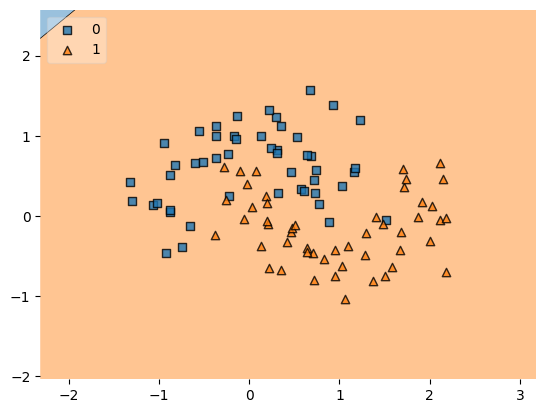

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Setting non-zero or constant value

In [31]:
#Setting initial weights to zero(0.5)
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [32]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [33]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5071 - loss: 1.2127 - val_accuracy: 0.5000 - val_loss: 1.1460
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5110 - loss: 1.2053 - val_accuracy: 0.5000 - val_loss: 1.1402
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4836 - loss: 1.2600 - val_accuracy: 0.5000 - val_loss: 1.1344
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4836 - loss: 1.2406 - val_accuracy: 0.5000 - val_loss: 1.1286
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5383 - loss: 1.1108 - val_accuracy: 0.5000 - val_loss: 1.1229
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5032 - loss: 1.1875 - val_accuracy: 0.5000 - val_loss: 1.1172
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5071 - loss: 1.1728 - val_accuracy: 0.5000 - val_loss: 1.1116
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5227 - loss: 1.1358 - val_accuracy: 0.5000 - val_loss

In [34]:
model.get_weights()

[array([[0.58503354, 0.58503354, 0.58503354, 0.58503354, 0.58503354],
        [0.24774668, 0.24774668, 0.24774668, 0.24774668, 0.24774668]],
       dtype=float32),
 array([0.26963654, 0.26963654, 0.26963654, 0.26963654, 0.26963654],
       dtype=float32),
 array([[0.2495755],
        [0.2495755],
        [0.2495755],
        [0.2495755],
        [0.2495755]], dtype=float32),
 array([0.24023251], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

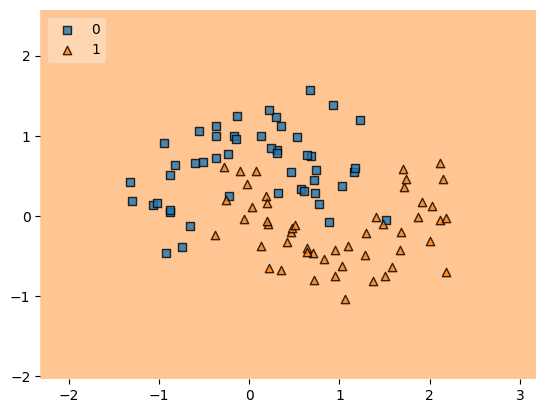

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# # Setting weights random (small value)

In [36]:
# Initializing weights with random small values
initial_weights[0] = np.random.randn(*model.get_weights()[0].shape) * 0.01
initial_weights[1] = np.random.randn(*model.get_weights()[1].shape) * 0.01
initial_weights[2] = np.random.randn(*model.get_weights()[2].shape) * 0.01
initial_weights[3] = np.random.randn(*model.get_weights()[3].shape) * 0.01


In [37]:
model.set_weights(initial_weights)
model.get_weights()

[array([[-0.0100743 ,  0.00623307, -0.00372796,  0.0055488 ,  0.00098836],
        [ 0.0193459 , -0.03184228,  0.0043178 ,  0.00204428,  0.00710734]],
       dtype=float32),
 array([-0.00646222, -0.01738472, -0.0045519 ,  0.02594606,  0.00393496],
       dtype=float32),
 array([[ 0.01148092],
        [-0.01174266],
        [-0.00614737],
        [-0.01053173],
        [ 0.02467213]], dtype=float32),
 array([-0.00678903], dtype=float32)]

In [38]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.3978 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4881 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6932
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4486 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4954 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [39]:
model.get_weights()

[array([[ 0.39029887, -0.4009794 , -0.44892487, -0.413143  ,  0.36651865],
        [-0.40243024,  0.40187466,  0.47938868,  0.44704452, -0.37916926]],
       dtype=float32),
 array([-0.00772331, -0.01536641,  0.00125143,  0.02223256,  0.00319684],
       dtype=float32),
 array([[ 0.11284728],
        [-0.09010132],
        [-0.10645232],
        [-0.10091508],
        [ 0.12612212]], dtype=float32),
 array([0.00454103], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

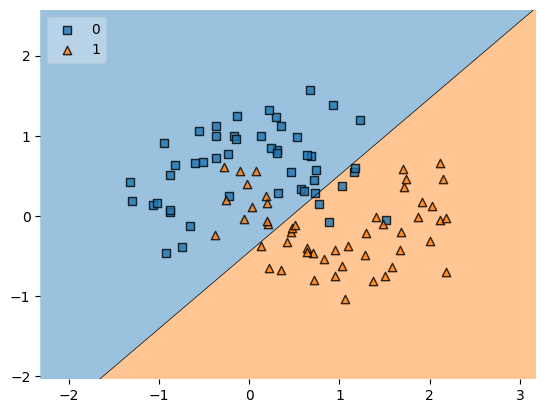

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Initializing weights with large random values to observe vanishing/exploding gradient problems

In [41]:

initial_weights[0] = np.random.randn(*model.get_weights()[0].shape) * 100
initial_weights[1] = np.random.randn(*model.get_weights()[1].shape) * 100
initial_weights[2] = np.random.randn(*model.get_weights()[2].shape) * 100
initial_weights[3] = np.random.randn(*model.get_weights()[3].shape) * 100


In [42]:
model.set_weights(initial_weights)
model.get_weights()

[array([[  27.584694,  -66.7833  ,  109.10897 ,  -38.803944, -141.99521 ],
        [  71.209465,  -72.77344 , -122.06048 ,  125.19462 ,  -16.50668 ]],
       dtype=float32),
 array([ 195.8075  ,   20.059565,    7.721819,   63.385098, -124.228004],
       dtype=float32),
 array([[ -51.649227 ],
        [  44.456898 ],
        [-104.12591  ],
        [  -3.8420138],
        [ -42.75758  ]], dtype=float32),
 array([-185.36707], dtype=float32)]

In [43]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4929 - loss: 157.3738 - val_accuracy: 0.5000 - val_loss: 159.7827
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5007 - loss: 153.9810 - val_accuracy: 0.5000 - val_loss: 159.7767
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4890 - loss: 156.0429 - val_accuracy: 0.5000 - val_loss: 159.7707
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4968 - loss: 155.7145 - val_accuracy: 0.5000 - val_loss: 159.7646
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5007 - loss: 155.7093 - val_accuracy: 0.5000 - val_loss: 159.7586
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4734 - loss: 164.2865 - val_accuracy: 0.5000 - val_loss: 159.7527
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4968 - loss: 155.4694 - val_accuracy: 0.5000 - val_loss: 159.7467
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4773 - loss: 162.7306 - v

In [44]:
model.get_weights()

[array([[  27.584694,  -66.55014 ,  108.98511 ,  -38.973263, -141.99521 ],
        [  71.209465,  -73.0097  , -122.19938 ,  125.02854 ,  -16.50668 ]],
       dtype=float32),
 array([ 195.8075   ,   20.280666 ,    7.5567136,   63.214935 ,
        -124.228004 ], dtype=float32),
 array([[ -51.35323  ],
        [  44.740192 ],
        [-103.83093  ],
        [  -3.5548108],
        [ -42.75758  ]], dtype=float32),
 array([-185.07109], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

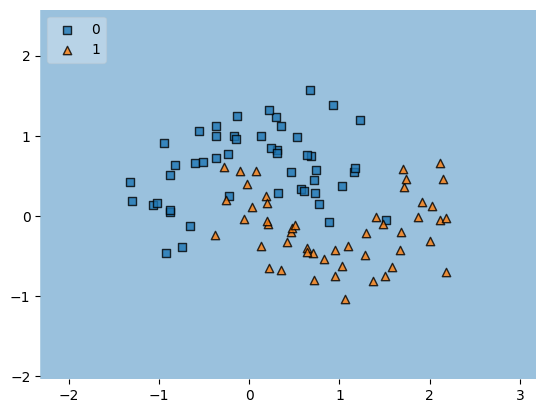

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# What not to do during weight initialization

# 1) Don't initialize zero (0).
# 2) Don't initialize constant value ( like 0.5).
# 3) Don't initialize any small random value.
# 4) Don't initialize any large random value.